In [1]:
import pandas as pd
df = pd.read_csv("heart_disease.csv")
print(df.head())

   Age  Gender  Cholesterol  Blood Pressure Heart Disease
0   68    Male          210             138            No
1   58    Male          197             101            No
2   44  Female          296             150            No
3   72  Female          153             108           Yes
4   37  Female          184             165            No


1. Load the Dataset

In [2]:
# Check for missing values
print(df.isnull().sum())

Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64


In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [4]:
# Handle missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

2. Feature Engineering

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode 'Gender' and 'Heart Disease' if categorical
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])       # Male=1, Female=0
df['Heart Disease'] = LabelEncoder().fit_transform(df['Heart Disease'])  # Yes=1, No=0

# Split features and target
X = df[['Age', 'Gender', 'Cholesterol', 'Blood Pressure']]
y = df['Heart Disease']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


3. Model Training


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

4. Model Evaluation

Confusion Matrix:
 [[14 13]
 [ 4  9]]


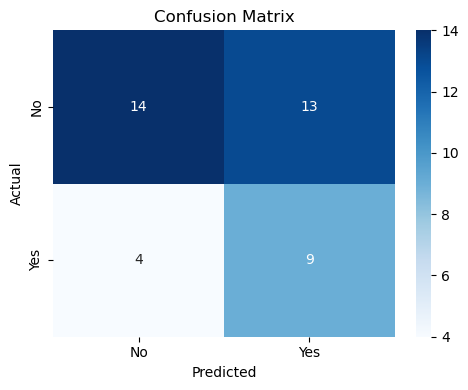


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.52      0.62        27
           1       0.41      0.69      0.51        13

    accuracy                           0.57        40
   macro avg       0.59      0.61      0.57        40
weighted avg       0.66      0.57      0.59        40

Accuracy: 0.575


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Classification Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


In [13]:
#Logistic Regression Model
#Evaluation Report
df['Heart Disease'].value_counts()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[14 13]
 [ 4  9]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.62        27
           1       0.41      0.69      0.51        13

    accuracy                           0.57        40
   macro avg       0.59      0.61      0.57        40
weighted avg       0.66      0.57      0.59        40

